# Data Science

**Autor**: [Cyril Wendl](cyril.wendl@edu.zh.ch), Kantonsschule im Lee, Winterthur

**Praktikums-Betreuung**: [Naoki Peter](naoki.peter@edu.zh.ch), Kantonsschule Zürich-Nord

## Datensätze

<img src="https://balloon.tam.ch/share/afef44def727eebe2f47f6059473ab6d" align="right" alt="pandas" width="200" />

**Pandas** ist ein Python-Paket für die Analyse und Bearbeitung von tabellarischen Daten. Der Name leitet sich von dem englischen Begriff *panel data* (Paneldaten) ab.

In dieser Lernaufgabe lesen wir mit Hilfe von pandas zwei (bis optional drei) Datensätze ein. Laden Sie diese CSV-Dateien ebenfalls von Moodle herunter und speichern Sie diese in einem Unterordner `Data/`, im gleichen Verzeichnis wie diese Jupyter-Notebook-Datei.

<div style="display: flex">
<div class="alert alert-box alert-info">
    
### Student Performance & Behavior Dataset
Der `Student Performance & Behavior Dataset` enthält reale Daten von 5.000 Einträgen, die von einem privaten Bildungsanbieter gesammelt wurden. Dieser Datensatz bietet wichtige Attribute, um Muster, Korrelationen und Erkenntnisse im Zusammenhang mit der akademischen Leistung zu untersuchen.

**Spalten:**
- **Student_ID**: Eindeutige Kennung für jeden Studenten.
- **First_Name**: Vorname des Studenten.
- **Last_Name**: Nachname des Studenten.
- **Email**: Kontakt-E-Mail (kann anonymisiert werden).
- **Gender**: Geschlecht (Männlich, Weiblich, Andere).
- **Age**: Alter des Studenten.
- **Department**: Abteilung des Studenten (z. B. Informatik, Ingenieurwesen, Wirtschaft).
- **Attendance (%)**: Anwesenheitsprozentsatz (0-100%).
- **Midterm_Score**: Punktzahl der Zwischenprüfung (von 100).
- **Final_Score**: Punktzahl der Abschlussprüfung (von 100).
- **Assignments_Avg**: Durchschnittliche Punktzahl aller Aufgaben (von 100).
- **Quizzes_Avg**: Durchschnittliche Punktzahl aller Quizze (von 100).
- **Participation_Score**: Punktzahl basierend auf der Klassenbeteiligung (0-10).
- **Projects_Score**: Bewertung der Projekte (von 100).
- **Total_Score**: Gewichtete Summe aller Noten.
- **Grade**: Buchstabenbewertung (A, B, C, D, F).
- **Study_Hours_per_Week**: Durchschnittliche Lernstunden pro Woche.
- **Extracurricular_Activities**: Teilnahme an außerschulischen Aktivitäten (Ja/Nein).
- **Internet_Access_at_Home**: Internetzugang zu Hause (Ja/Nein).
- **Parent_Education_Level**: Höchster Bildungsabschluss der Eltern (Keine, High School, Bachelor, Master, PhD).
- **Family_Income_Level**: Einkommensniveau der Familie (Niedrig, Mittel, Hoch).
- **Stress_Level (1-10)**: Selbstberichteter Stresslevel (1: Niedrig, 10: Hoch).
- **Sleep_Hours_per_Night**: Durchschnittliche Schlafstunden pro Nacht.

**Besonderheiten des Datensatzes:**
- Fehlende Werte (z. B. bei Anwesenheit, Aufgaben oder Bildungsniveau der Eltern).
- Verzerrungen in einigen Daten (z. B. bessere Noten bei hoher Anwesenheit).
- Ungleichgewicht in der Verteilung (z. B. mehr Studenten in bestimmten Abteilungen).
</div>
</div>

# Daten importieren und analysieren

In [15]:
import pandas as pd

In [16]:
student_data = pd.read_csv('Data/students_data.csv')
student_data.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


Der Rückgabewert von `read_csv` ist ein sogenanntes `DataFrame`-Objekt, was in pandas einer Tabelle entspricht. Dies lässt sich mit dem Python-Befehl `type()` ermitteln.

In [17]:
import matplotlib.pyplot as plt

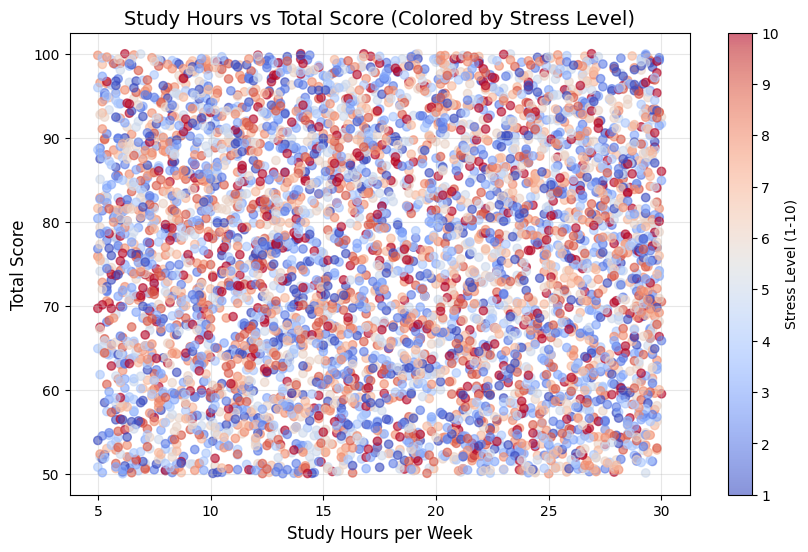

In [18]:
# Scatter plot: Relationship between Study Hours per Week and Total Score
plt.figure(figsize=(10, 6))
plt.scatter(student_data["Study_Hours_per_Week"], student_data["Total_Score"], alpha=0.6, c=student_data["Stress_Level (1-10)"], cmap="coolwarm")
plt.colorbar(label="Stress Level (1-10)")
plt.title("Study Hours vs Total Score (Colored by Stress Level)", fontsize=14)
plt.xlabel("Study Hours per Week", fontsize=12)
plt.ylabel("Total Score", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# 1. Bar chart: Average Total Score by Department
plt.figure(figsize=(10, 6))
student_data.groupby("Department")["Total_Score"].mean().sort_values().plot(kind="bar", color="skyblue")
plt.title("Average Total Score by Department", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Average Total Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.show()



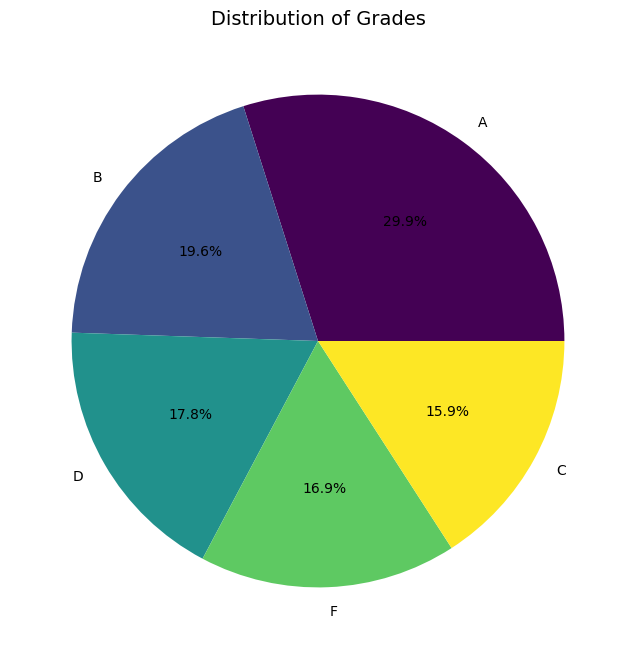

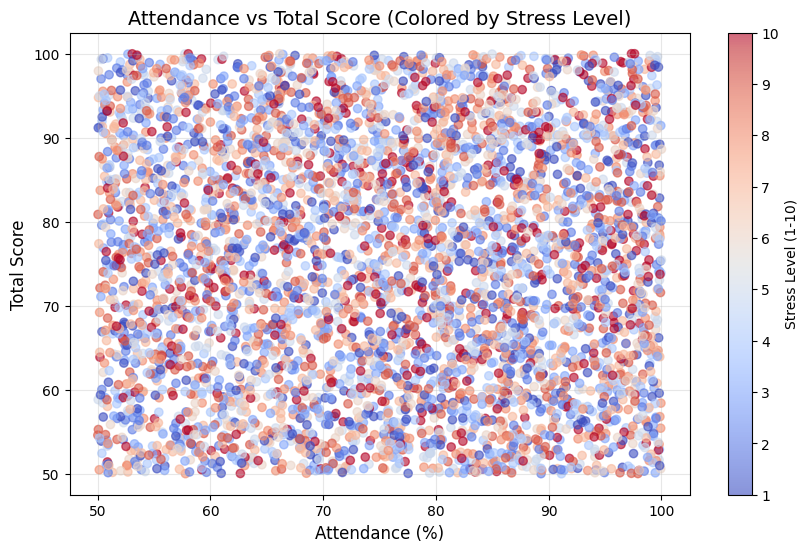

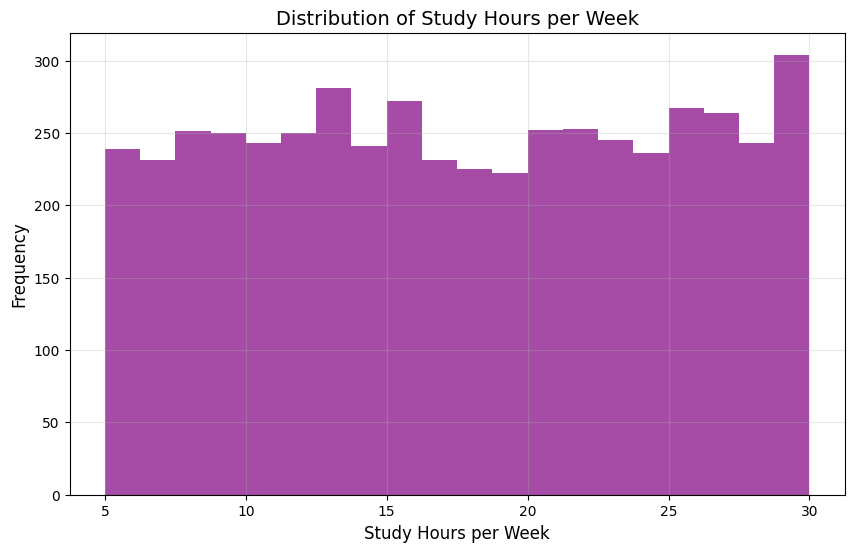

<Figure size 1000x600 with 0 Axes>

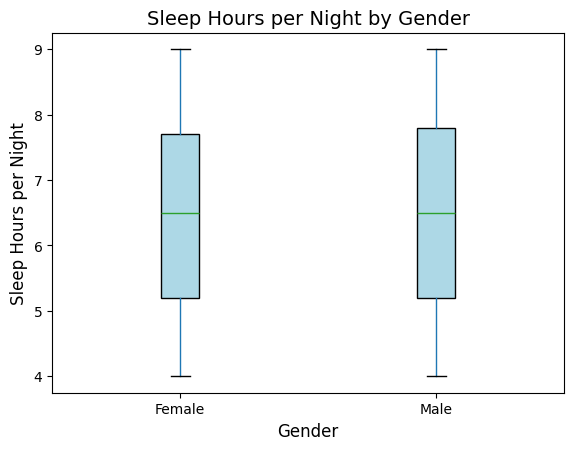

In [19]:
# 2. Pie chart: Distribution of Grades
student_data["Grade"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(8, 8), colormap="viridis")
plt.title("Distribution of Grades", fontsize=14)
plt.ylabel("")  # Hide y-axis label
plt.show()

# 3. Scatter plot: Relationship between Attendance and Total Score
plt.figure(figsize=(10, 6))
plt.scatter(student_data["Attendance (%)"], student_data["Total_Score"], alpha=0.6, c=student_data["Stress_Level (1-10)"], cmap="coolwarm")
plt.colorbar(label="Stress Level (1-10)")
plt.title("Attendance vs Total Score (Colored by Stress Level)", fontsize=14)
plt.xlabel("Attendance (%)", fontsize=12)
plt.ylabel("Total Score", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 4. Histogram: Distribution of Study Hours per Week
student_data["Study_Hours_per_Week"].plot.hist(bins=20, color="purple", alpha=0.7, figsize=(10, 6))
plt.title("Distribution of Study Hours per Week", fontsize=14)
plt.xlabel("Study Hours per Week", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 5. Box plot: Sleep Hours per Night by Gender
plt.figure(figsize=(10, 6))
student_data.boxplot(column="Sleep_Hours_per_Night", by="Gender", grid=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Sleep Hours per Night by Gender", fontsize=14)
plt.suptitle("")  # Remove default title
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Sleep Hours per Night", fontsize=12)
plt.show()

In [20]:
student_data.set_index("Student_ID", inplace=True)
student_data.head()

,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
Student_ID,,,,,,,,,,,,,,,,,,,,,
S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,NaN,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


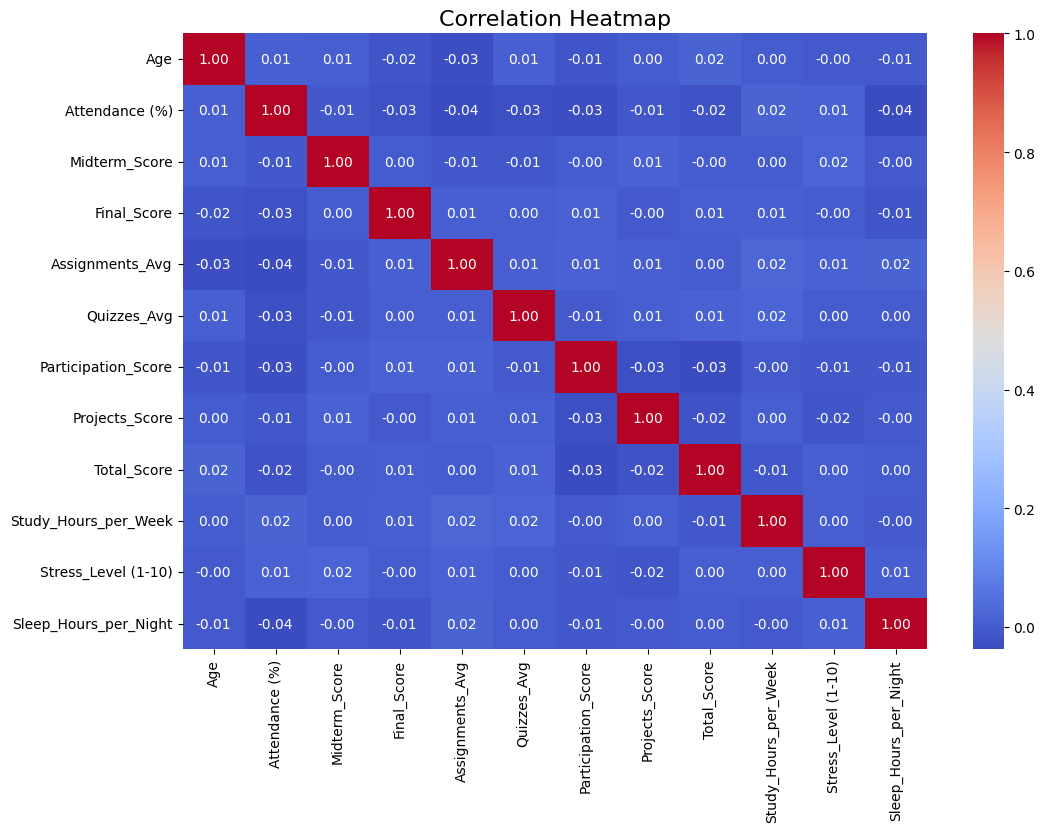

In [22]:
import seaborn as sns

# 1. Heatmap: Correlation between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = student_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()



/var/folders/2k/bqsl40yx6p7d5l_lccz2cdj40000gn/T/ipykernel_7017/337036398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grade", y="Total_Score", data=student_data, palette="Set2")


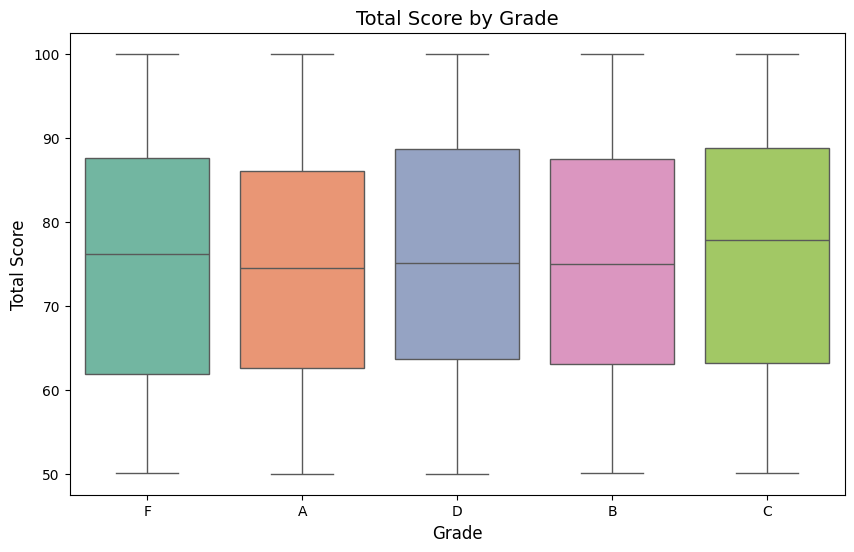

/var/folders/2k/bqsl40yx6p7d5l_lccz2cdj40000gn/T/ipykernel_7017/337036398.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Gender", y="Study_Hours_per_Week", data=student_data, split=True, palette="muted")


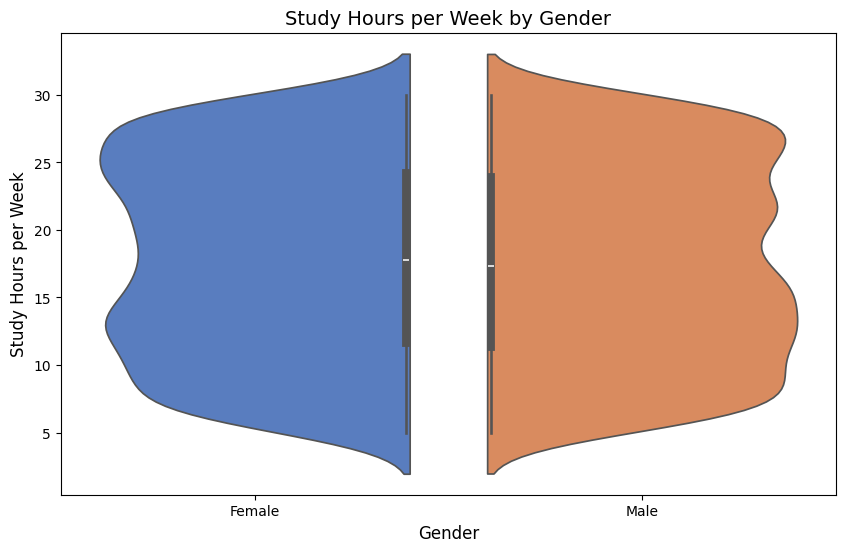

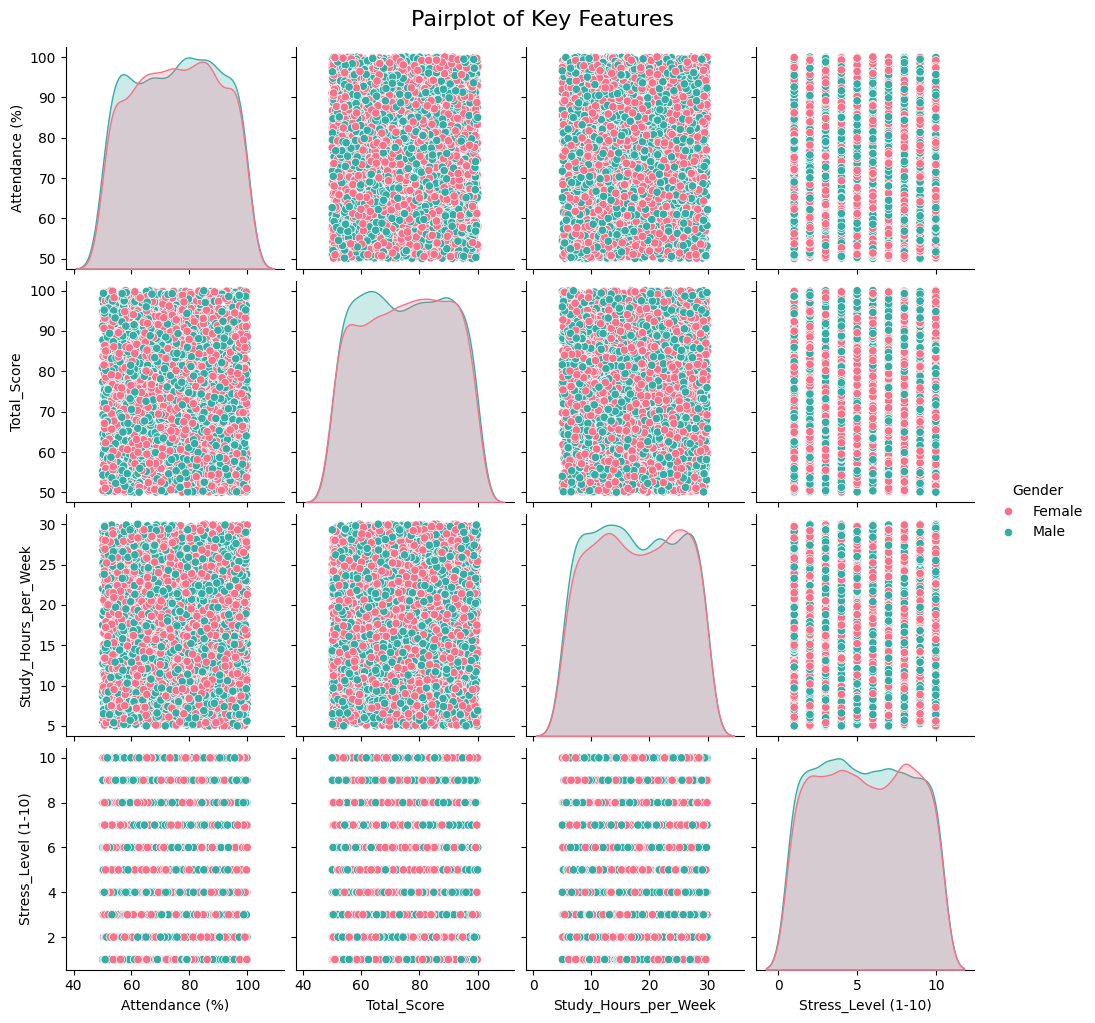

/var/folders/2k/bqsl40yx6p7d5l_lccz2cdj40000gn/T/ipykernel_7017/337036398.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Grade", data=student_data, palette="pastel", order=student_data["Grade"].value_counts().index)


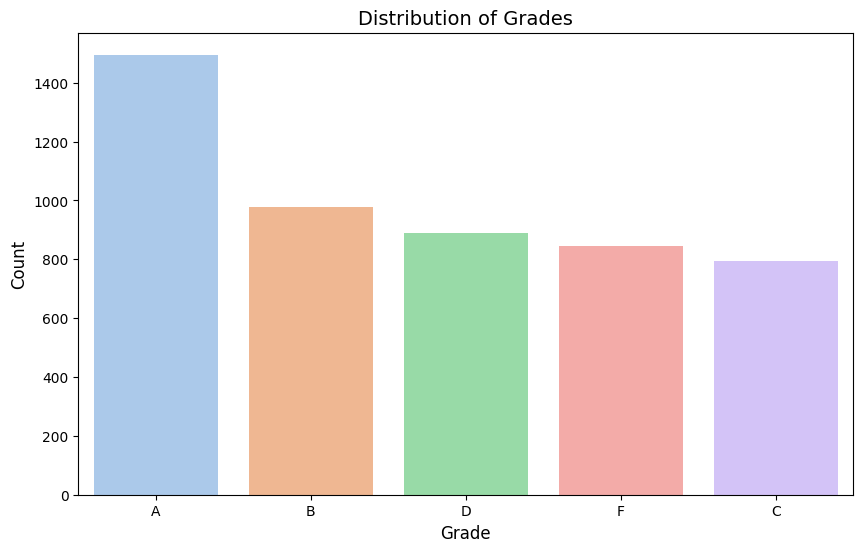

In [23]:
# 2. Boxplot: Total Score by Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x="Grade", y="Total_Score", data=student_data, palette="Set2")
plt.title("Total Score by Grade", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Total Score", fontsize=12)
plt.show()

# 3. Violin Plot: Study Hours per Week by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(x="Gender", y="Study_Hours_per_Week", data=student_data, split=True, palette="muted")
plt.title("Study Hours per Week by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Study Hours per Week", fontsize=12)
plt.show()

# 4. Pairplot: Relationships between key numerical features
sns.pairplot(student_data, vars=["Attendance (%)", "Total_Score", "Study_Hours_per_Week", "Stress_Level (1-10)"], hue="Gender", palette="husl")
plt.suptitle("Pairplot of Key Features", y=1.02, fontsize=16)
plt.show()

# 5. Countplot: Distribution of Grades
plt.figure(figsize=(10, 6))
sns.countplot(x="Grade", data=student_data, palette="pastel", order=student_data["Grade"].value_counts().index)
plt.title("Distribution of Grades", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()